# Web Scraping - Wikipedia
## The largest 100 companies in US by revenue


In [8]:
!pip install pandas matplotlib


### Importing Libraries

In [5]:
# Import BeautifulSoup for web scraping
from bs4 import BeautifulSoup
# Import requests for making HTTP requests
import requests
# Import time for managing time-related tasks
import time
# Importing pandas for data manipulation and analysis
# It is commonly aliased as 'pd' for brevity
import pandas as pd
# Import matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt
# Import smtplib for sending emails using the SMTP protocol
import smtplib
# Import ssl for Secure Sockets Layer, used for encryption
import ssl
# Import necessary modules for email handling and composition
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.header import Header


### Initiating the Web Scraping Process

In [9]:
# Connect to the Website and pull in data
URL = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# User Agent
headers = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

page = requests.get(URL)

In [10]:
# Enchance HTML printing
soup = BeautifulSoup(page.text, 'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of largest companies in the United States by revenue - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-

In [11]:
# Pulling the relevant information from the list, starting from position #1
soup.find_all('table')[1]

# or

soup.find('table', class_ = 'wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [12]:
# Assigning a variable
table = soup.find_all('table')[1]

print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [13]:
# Pulling 'th' tags - related to the index COLUMNS titles - 'th'
table.find_all('th')

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [14]:
# Assigning a variable to the column titles, FIRST TABLE ONLY 
world_titles = table.find_all('th')

print(world_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [15]:
# Looping through the FIRST TABLE ONLY and getting ONLY the column titles + cleaning the results using '.strip()'
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


# Using Pandas
## Organizing columns, rows and data

In [16]:
# Extracting the headers/titles and putting into a dataframe
df = pd.DataFrame(columns = world_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [17]:
# Pulling 'tr' tags - related to the index ROWS - 'tr'
column_data = table.find_all('tr')

In [18]:
# looping through 'tr' tags(row of data) from position 1 
for row in column_data[1:]:
# As we are looping through it, we are looking for 'td' tags(individual data)
    row_data = row.find_all('td')
# Taking and cleaning each piece of data, and getting out the text 
    individual_row_data = [data.text.strip() for data in row_data]

# Checking the length of dataframe each time it is looping through and putting the informationm in the next position
    length = len(df)
    df.loc[length] = individual_row_data
    
    
    
# print(individual_row_data) 


## Web Scraping Complete - Pandas Dataframe

In [19]:
#Dataframe with columns, rows and data
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


## Saving Scraped info into CSV in my local machine

In [20]:
# Naming the file 'companies_revenue.csv' and Exporting into CSV file without exporting the index into CSV 'index = False'
df.to_csv(r'C:\Users\jefff\Desktop\PYTHON_ Wiki_Web scraper\companies_revenue1.csv', index = False)

## Emaling CSV file as an attachment

In [22]:

# Setup port number and server name
smtp_port = 587  # Standard secure SMTP port
smtp_server = "smtp.gmail.com"  # Google SMTP Server

email_from = "jeff.farias@gmail.com"
email_to = ["jeff.farias@gmail.com"]  # Email to multiple addresses

# SMTP Email / App Password as a string
pswd = ""   # Hidden for security reasons

# Content of the message
message_text = "Hi, please check the attached file about the top 100 companies in US by revenue. Best regards, Jefferson."

# Subject of the email
subject = "Top 100 US Companies by Revenue"

# Create an SSL context
simple_email_context = ssl.create_default_context()

try:
    # Connect to the server
    print("Connecting to server...")
    TIE_server = smtplib.SMTP(smtp_server, smtp_port)
    TIE_server.starttls(context=simple_email_context)
    TIE_server.login(email_from, pswd)
    print("Connected to server :-)")

    # Create a multipart message
    message = MIMEMultipart()
    message.attach(MIMEText(message_text, "plain"))

    # Attach the CSV file
    with open(r'C:\Users\jefff\Desktop\PYTHON_ Wiki_Web scraper\companies_revenue1.csv', 'rb') as attachment:
        part = MIMEApplication(attachment.read(), Name="companies_revenue1.csv")
        part['Content-Disposition'] = f'attachment; filename="companies_revenue1.csv"'
        message.attach(part)

    # Set the subject of the email
    message['Subject'] = Header(subject, 'utf-8')

    # Send the email
    print(f"Sending email to - {email_to}")
    TIE_server.sendmail(email_from, email_to, message.as_string())
    print(f"Email successfully sent to - {email_to}")

except Exception as e:
    print(e)

finally:
    # Close the server connection
    TIE_server.quit()


Connecting to server...
Connected to server :-)
Sending email to - ['jeff.farias@gmail.com']
Email successfully sent to - ['jeff.farias@gmail.com']


# Data Analysis
## The largest 100 companies in US by revenue

# Exploratory Data Analysis

In [141]:
#dataframe
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [120]:
#first 10 records
df.head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,8,Alphabet,Technology,"282,836",9.8%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


In [121]:
#last 10 records
df.tail(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
90,91,American Airlines,Airline,"48,971",63.9%,"129,700","Fort Worth, Texas"
91,92,CHS,Agriculture cooperative,"47,194",24.3%,"10,014","Inver Grove Heights, Minnesota"
92,93,Performance Food Group,Food Processing,"47,194",61.6%,"34,825","Richmond, Virginia"
93,94,PBF Energy,Petroleum industry,"46,830",71.8%,"3,616","Parsippany–Troy Hills, New Jersey"
94,95,Nike,Apparel,"46,710",4.9%,"79,100","Beaverton, Oregon"
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"
99,100,Qualcomm,Technology,"44,200",31.7%,"51,000","San Diego, California"


In [143]:
#describe the dimensions of DataFrame 'df'
df.shape

(100, 7)

In [142]:
#provides summary statistics for the numeric columns within that DataFrame
df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,38,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [144]:
# access the column named "Name" within the DataFrame 'df'
df.Name

0                      Walmart
1                       Amazon
2                  Exxon Mobil
3                        Apple
4           UnitedHealth Group
                ...           
95                    Best Buy
96        Bristol-Myers Squibb
97             United Airlines
98    Thermo Fisher Scientific
99                    Qualcomm
Name: Name, Length: 100, dtype: object

In [145]:
# access the column named "industry" within the DataFrame 'df'
df.Industry

0                         Retail
1     Retail and cloud computing
2             Petroleum industry
3           Electronics industry
4                     Healthcare
                 ...            
95                        Retail
96       Pharmaceutical industry
97                       Airline
98        Laboratory instruments
99                    Technology
Name: Industry, Length: 100, dtype: object

In [146]:
# calculates the number of distinct (unique) values in the "Industry" column on the DataFrame "df" 
distinct_count_n = df['Industry'].nunique()
print(distinct_count_n)


38


In [119]:
# extracts and prints a list of distinct (unique) values from the "Industry" column on the DataFrame "df".
distinct_values_list = df['Industry'].drop_duplicates().tolist()

distinct_values_list

['Retail',
 'Retail and cloud computing',
 'Petroleum industry',
 'Electronics industry',
 'Healthcare',
 'Conglomerate',
 'Technology',
 'Health',
 'Pharmaceutical industry',
 'Health Insurance',
 'Automotive industry',
 'Automotive',
 'Financial services',
 'Telecommunications',
 'Financials',
 'Food industry',
 'Transportation',
 'Beverage',
 'Media',
 'Automotive and Energy',
 'Consumer products Manufacturing',
 'Logistics',
 'Food Service',
 'Aerospace and defense',
 'Aerospace and Defense',
 'Infotech',
 'Machinery',
 'Petroleum industry and Logistics',
 'Insurance',
 'Chemical industry',
 'Financial',
 'Food Processing',
 'Agriculture manufacturing',
 'Telecom Hardware Manufacturing',
 'Airline',
 'Agriculture cooperative',
 'Apparel',
 'Laboratory instruments']

### List of top industries sectors in USA

In [88]:
# Given data
data = ['Retail', 'Retail and cloud computing', 'Petroleum industry', 'Electronics industry', 'Healthcare', 'Conglomerate', 'Technology', 'Health', 'Pharmaceutical industry', 'Health Insurance', 'Automotive industry', 'Automotive', 'Financial services', 'Telecommunications', 'Financials', 'Food industry', 'Transportation', 'Beverage', 'Media', 'Automotive and Energy', 'Consumer products Manufacturing', 'Logistics', 'Food Service', 'Aerospace and defense', 'Aerospace and Defense', 'Infotech', 'Machinery', 'Petroleum industry and Logistics', 'Insurance', 'Chemical industry', 'Financial', 'Food Processing', 'Agriculture manufacturing', 'Telecom Hardware Manufacturing', 'Airline', 'Agriculture cooperative', 'Apparel', 'Laboratory instruments']

# Create a pandas DataFrame
df_index_Industry = pd.DataFrame(data, columns=['Industry'])

# Reset the index to start from 1
df_index_Industry.index = df_index_Industry.index + 1

# Display the DataFrame
df_index_Industry


,Industry
1,Retail
2,Retail and cloud computing
3,Petroleum industry
4,Electronics industry
5,Healthcare
6,Conglomerate
7,Technology
8,Health
9,Pharmaceutical industry
10,Health Insurance


### Industry sectors by Count

In [89]:
# counts the occurrences of each unique value in the "Industry" column on the DataFrame "df". 
df.Industry.value_counts()

Financials                          11
Retail                              10
Petroleum industry                  10
Technology                           8
Pharmaceutical industry              7
Healthcare                           6
Insurance                            5
Conglomerate                         4
Telecommunications                   3
Airline                              3
Transportation                       2
Food industry                        2
Health Insurance                     2
Financial                            2
Food Processing                      2
Chemical industry                    1
Petroleum industry and Logistics     1
Machinery                            1
Agriculture manufacturing            1
Aerospace and Defense                1
Telecom Hardware Manufacturing       1
Agriculture cooperative              1
Apparel                              1
Infotech                             1
Automotive and Energy                1
Aerospace and defense    

### Top 10 Industry sectors by Count
### Graphic Visualization

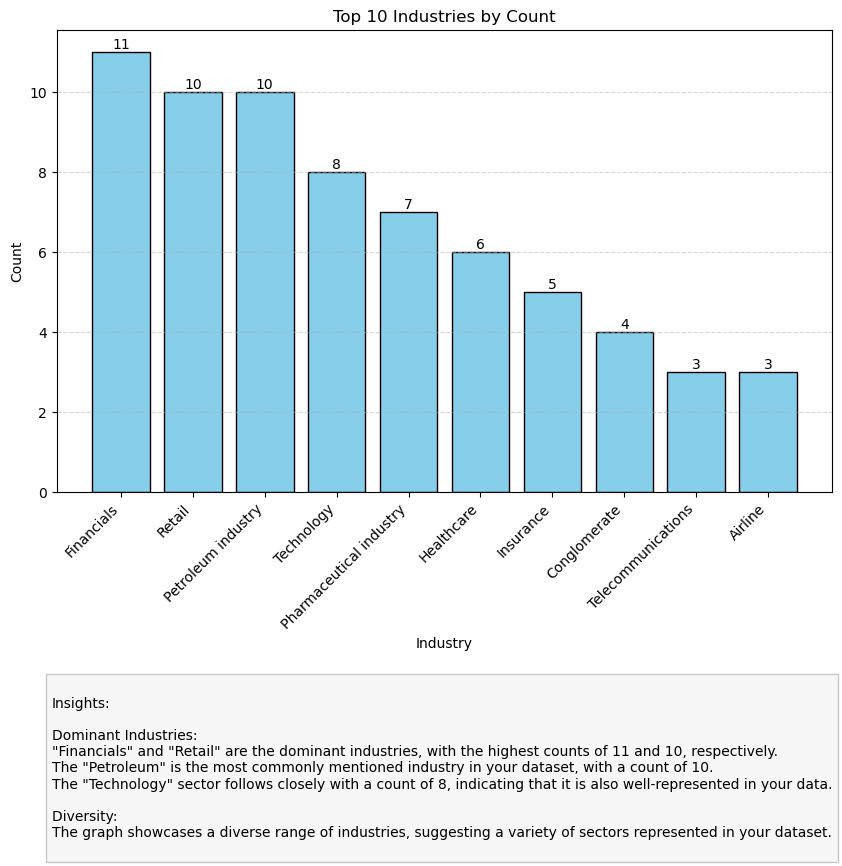

In [137]:
#data given
#list of tuples
data_plot1 = {
    'Industry': ['Financials', 'Retail', 'Petroleum industry', 'Technology', 'Pharmaceutical industry', 'Healthcare', 'Insurance', 'Conglomerate', 'Telecommunications', 'Airline'],
    'Count': [11, 10, 10, 8, 7, 6, 5, 4, 3, 3]
}

# Create a DataFrame from the data
df_plot1 = pd.DataFrame(data_plot1)

# Sort the DataFrame by count in descending order
df_plot1 = df_plot1.sort_values(by='Count', ascending=False)

# Plotting a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
bars1 = plt.bar(df_plot1['Industry'], df_plot1['Count'], color='skyblue', edgecolor='black')

# Add data labels inside the bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 10 Industries by Count')

# Add a text box separately from the graph on the right side
text_box = """
Insights:

Dominant Industries: 
"Financials" and "Retail" are the dominant industries, with the highest counts of 11 and 10, respectively.
The "Petroleum" is the most commonly mentioned industry in your dataset, with a count of 10.
The "Technology" sector follows closely with a count of 8, indicating that it is also well-represented in your data.

Diversity: 
The graph showcases a diverse range of industries, suggesting a variety of sectors represented in your dataset.
"""

# Position the text box on the right side using axes coordinates
plt.gca().text(0.12, -0.35, text_box, transform=plt.gcf().transFigure, fontsize=10, ha='left', va='center',
             bbox=dict(facecolor='lightgray', alpha=0.2))

plt.show()



###  Top 10 headquarters locations

In [128]:
# Top 10 headquarters locations along with their respective counts 
top_10_headquarters = df['Headquarters'].value_counts().head(10)

top_10_headquarters


New York City, New York    12
Houston, Texas              5
Atlanta, Georgia            3
Chicago, Illinois           3
Cincinnati, Ohio            2
Boston, Massachusetts       2
Deerfield, Illinois         2
Washington, D.C.            2
Dallas, Texas               2
Newark, New Jersey          1
Name: Headquarters, dtype: int64

### Top 10 headquarters locations
### Graphic Visualization

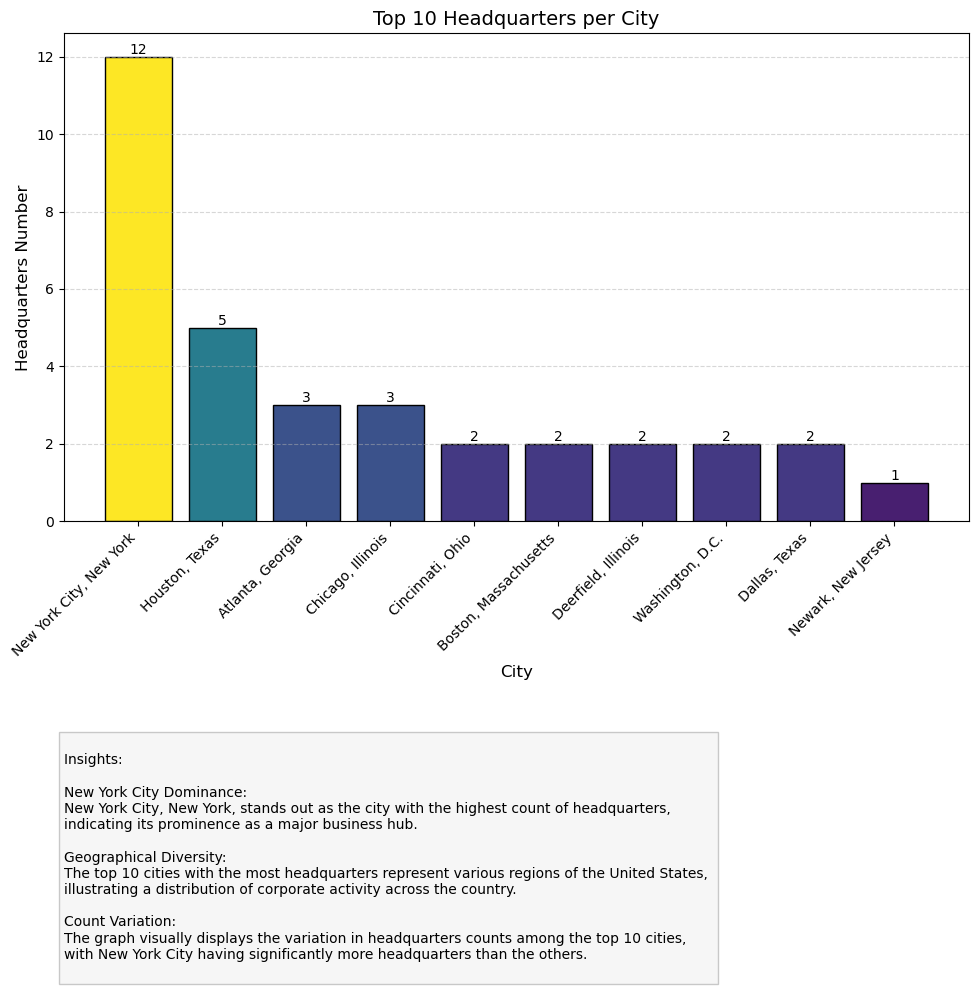

In [136]:
#data given
#list of tuples
data_plot = {
    'City': ['New York City, New York', 'Houston, Texas', 'Atlanta, Georgia','Chicago, Illinois', 'Cincinnati, Ohio' , 'Boston, Massachusetts', 'Deerfield, Illinois', 'Washington, D.C.', 'Dallas, Texas', 'Newark, New Jersey'],
    'Count': [12, 5, 3, 3, 2, 2, 2, 2, 2, 1]
}

# Create a DataFrame from the data
df_plot = pd.DataFrame(data_plot)

# Sort the DataFrame by 'Count' column in descending order
df_plot = df_plot.sort_values(by='Count', ascending=False)

# Plotting a bar graph with a color map
plt.figure(figsize=(10, 7))  # Set the figure size (width, height)
bars = plt.bar(df_plot['City'], df_plot['Count'], color=plt.cm.viridis(df_plot['Count']/df_plot['Count'].max()), edgecolor='black') # Using a color map
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels and increase font size for better readability
plt.xlabel('City', fontsize=12)
plt.ylabel('Headquarters Number', fontsize=12)
plt.title('Top 10 Headquarters per City', fontsize=14)

def label_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

label_bars(bars)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis labels
plt.tight_layout()  # To ensure labels are not cut off

# Adding a text box
info_text = """
Insights: 

New York City Dominance: 
New York City, New York, stands out as the city with the highest count of headquarters, 
indicating its prominence as a major business hub.

Geographical Diversity: 
The top 10 cities with the most headquarters represent various regions of the United States, 
illustrating a distribution of corporate activity across the country.

Count Variation: 
The graph visually displays the variation in headquarters counts among the top 10 cities, 
with New York City having significantly more headquarters than the others.
"""

plt.gcf().text(0.08, -0.4, info_text, fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))

plt.show()



### Top 10 Most Profitable Companies in the USA

In [124]:
#first 10 records
df.head(10)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,8,Alphabet,Technology,"282,836",9.8%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


In [126]:
# Company 'name' and 'Revenue (USD millions)'

# given data
#list of tuples
data_revenue = {
    "Name": [
        "Walmart", "Amazon","Exxon Mobil", "Apple", "UnitedHealth Group", "CVS Health"
        , "Berkshire Hathaway", "Alphabet", "McKesson Corporation",
        "Chevron Corporation"
    ],
    
    
    "Revenue (USD millions)": [
        611289, 513983, 413680, 394328, 324162,
        322467, 302089, 282836, 276711, 246252
    ]
}

# Create DataFrame
df_revenue = pd.DataFrame(data_revenue)


df_revenue.index = df_revenue.index + 1

# Display only the "name" and "Revenue (USD millions)" column
df_revenue




,Name,Revenue (USD millions)
1,Walmart,611289
2,Amazon,513983
3,Exxon Mobil,413680
4,Apple,394328
5,UnitedHealth Group,324162
6,CVS Health,322467
7,Berkshire Hathaway,302089
8,Alphabet,282836
9,McKesson Corporation,276711
10,Chevron Corporation,246252


### Simpler way to output the Top 10 Most Profitable Companies in the USA
#### Through a variable

In [150]:
data_revenue_1 = df[['Name', 'Revenue (USD millions)']]

data_revenue_1.head(10)

,Name,Revenue (USD millions)
0,Walmart,"611,289"
1,Amazon,"513,983"
2,Exxon Mobil,"413,680"
3,Apple,"394,328"
4,UnitedHealth Group,"324,162"
5,CVS Health,"322,467"
6,Berkshire Hathaway,"302,089"
7,Alphabet,"282,836"
8,McKesson Corporation,"276,711"
9,Chevron Corporation,"246,252"


### Top 10 Most Profitable Companies in the USA
### Graphic Visualization

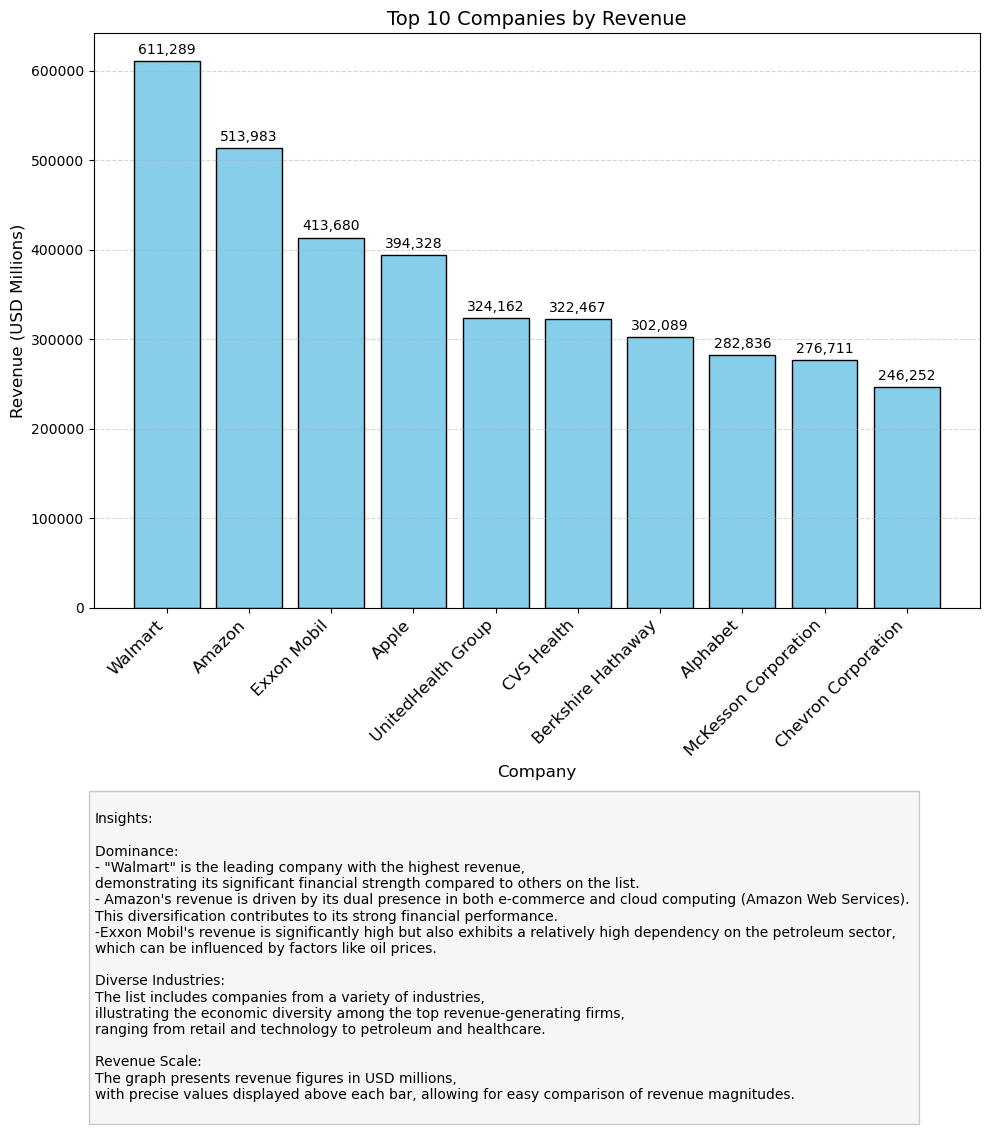

In [139]:
# Given data, list of tuples
companies = [
    "Walmart", "Amazon", "Exxon Mobil", "Apple", "UnitedHealth Group", "CVS Health",
    "Berkshire Hathaway", "Alphabet", "McKesson Corporation", "Chevron Corporation"
]

revenues = [
    611289, 513983, 413680, 394328, 324162,
    322467, 302089, 282836, 276711, 246252
]

# Plotting the graph
plt.figure(figsize=(10, 8))
bars2 = plt.bar(companies, revenues, color='skyblue', edgecolor='black')

plt.xlabel('Company', fontsize=12)
plt.ylabel('Revenue (USD Millions)', fontsize=12)
plt.title('Top 10 Companies by Revenue', fontsize=14)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels above each bar
for bar in bars2:
    height = bar.get_height()
    plt.annotate(
        f'{height:,}',  # Format revenue with commas for better readability
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset for the value label
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align x-axis labels
plt.tight_layout()  # To avoid cropping of labels

# Adding a text box
info_text = """
Insights:

Dominance: 
- "Walmart" is the leading company with the highest revenue, 
demonstrating its significant financial strength compared to others on the list.
- Amazon's revenue is driven by its dual presence in both e-commerce and cloud computing (Amazon Web Services). 
This diversification contributes to its strong financial performance.
-Exxon Mobil's revenue is significantly high but also exhibits a relatively high dependency on the petroleum sector, 
which can be influenced by factors like oil prices.

Diverse Industries: 
The list includes companies from a variety of industries, 
illustrating the economic diversity among the top revenue-generating firms, 
ranging from retail and technology to petroleum and healthcare.

Revenue Scale: 
The graph presents revenue figures in USD millions, 
with precise values displayed above each bar, allowing for easy comparison of revenue magnitudes.
"""

plt.gcf().text(0.1, -0.4, info_text, fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))

plt.show()
